# Bitcoin Stock Prediction Using Deep Learning and Sentiment Analysis
---

### This notebook analyzes Bitcoin historical values and how we can predict next values for Bitcoin closing prices

## Introduction

### What is a crypto currency  and why Bitcoin?

According to wikipedia, a cryptocurrency is a digital asset designed to work as a medium of exchange using "cryptography" to secure the transactions and to control the creation of additional units of the currency by "mining". 

While the best-known example of a cryptocurrency is Bitcoin, there are more than 100 other tradable cryptocurrencies, called altcoins (meaning alternative to Bitcoin), competing each other and with Bitcoin. 

The motive behind this competition is that there are a number of design flaws in Bitcoin, and people are trying to invent new coins to overcome these defects hoping their inventions will eventually replace Bitcoin. 

To June 2017, the total market capital of all cryptocurrencies is 102 billion in USD, 41 of which is of Bitcoin. Therefore, regardless of its design faults, Bitcoin is still the dominant cryptocurrency in markets. As a result, many altcoins cannot be bought with fiat currencies, but only be traded against Bitcoin. 

Hence, I chose Bitcoin as my commodity in order to make wiser future investments for my cryptocurrency portfolio.

The ubiquity of Internet access has triggered the emergence of currencies distinct from those used in the prevalent monetary system. The advent of cryptocurrencies based on a unique method called “mining” has brought about significant changes in the online economic activities of users.

Cryptocurrencies are primarily characterized by fluctuations in their price and number of transactions [\[1\]](#ref1)[\[2\]](#ref2). Although Bitcoin was first introduced in 2008 [\[2\]](#ref2)[\[3\]](#ref3), it had witnessed no significant fluctuation in its price and number of transactions until the end of 2013 [\[2\]](#ref2), when it began to garner worldwide attention, and witnessed a significant rise and fluctuation in its price and number of transactions. Such unstable fluctuations have served as an opportunity for speculation for some users while hindering most others from using cryptocurrencies [\[1\]](#ref1)[\[4\]](#ref4)[\[5\]](#ref5)

## Methods

My research will follow a comparative approach. My first framework is a Recurrent Neural Network trained on 3 popular stock market indicators and past prices as key data points to find an optimal technique for cryptocurrency stock market prediction. 

My second framework is a sequential model, trained on the sentiment of the public company news history and past prices as key data points, consisting of a linear stack of 2 Long Short-Term Memory (LSTM) layers to generate a prediction vector for the whole input sequence and 1 Linear Dense Layer to aggregate the data into a single value.

Comparison will be made on the basis of their performance. Both techniques have some advantages and disadvantages. My research will analyze advantages and limitations of these techniques to find which technique is comparatively better for specifically Bitcoin stock market prediction. 

## Background

In a traditional recurrent neural network, during the gradient back-propagation phase, the gradient signal can end up being multiplied a large number of times (as many as the number of time steps) by the weight matrix associated with the connections between the neurons of the recurrent hidden layer. This means that, the magnitude of weights in the transition matrix can have a strong impact on the learning process.

If the weights in this matrix are small (or, more formally, if the leading eigenvalue of the weight matrix is smaller than 1.0), it can lead to a situation called vanishing gradients where the gradient signal gets so small that learning either becomes very slow or stops working altogether. It can also exacerbate the task of learning long-term dependencies in the data. Conversely, if the weights in this matrix are large (or, again, more formally, if the leading eigenvalue of the weight matrix is larger than 1.0), it can lead to a situation where the gradient signal is so large that it can cause learning to diverge. This is often referred to as exploding gradients.

These issues are the main motivation behind the LSTM model which introduces a new structure called a memory cell. A memory cell is composed of four main elements: an input gate, a neuron with a self-recurrent connection (a connection to itself), a forget gate and an output gate. The self-recurrent connection has a weight of 1.0 and ensures that, barring any outside interference, the state of a memory cell can remain constant from one time step to another.

![alt text](lstm_memorycell.png "LSTM")

The gates serve to modulate the interactions between the memory cell itself and its environment. The input gate can allow incoming signal to alter the state of the memory cell or block it. On the other hand, the output gate can allow the state of the memory cell to have an effect on other neurons or prevent it. Finally, the forget gate can modulate the memory cell’s self-recurrent connection, allowing the cell to remember or forget its previous state, as needed.

I believe the biggest difference between the NLP and financial analysis is that language has some guarantee of structure, it’s just that the rules of the structure are vague. Markets, on the other hand, don’t come with a promise of a learnable structure, that such a structure exists is the assumption that this project would prove or disprove (rather it might prove or disprove if I can find that structure).

Assuming that a structure exists; the idea of summarizing the current state of the market in the same way we encode the semantics of a paragraph seems plausible to me.

## A Data-Driven Approach To Cryptocurrency Speculation

*How do Bitcoin markets behave? What are the causes of the sudden spikes and dips in cryptocurrency values? How can we predict what will happen next?*

Research on the attributes of cryptocurrencies has made steady progress but has a long way to go. Most researchers analyze user sentiments related to cryptocurrencies on social media, e.g., Twitter, or quantified Web search queries on search engines, such as Google, as well as fluctuations in price and trade volume to determine any relation [\[6–10\]](#ref6to10). Past studies have been limited to Bitcoin because the large amount of data that it provides eliminates the need to build a model to predict fluctuations in the price and number of transactions of diverse cryptocurrencies.

Articles on cryptocurrencies, such as Bitcoin, are rife with speculation these days, with hundreds of self-proclaimed experts advocating for the trends that they expect to emerge. What is lacking from many of these analyses is a strong data analysis foundation to backup the claims. 

So, I felt that analysis of the top headlines on the first page of Google News results for the term **Bitcoin** to predict its closing price for the next day seemed like the most unbiased approach to resolving the biased opinions strewn around the web. I also felt exclusion of the **"Price"** suffix was justified by the fact that its inclusion led to Google News returning those biased news articles as opposed to just news revolving around Bitcoin that I feel is more relevant for my unbiased prediction of closing prices.

This approach also resonates with my personal approach to track the closing prices of the cryptocurrencies I have invested in. I always find myself skimming through the most important headlines on the first page of the Google News results. Extrapolation of my research method to apply to a sample of the population representing crytocurrency investors also seems fair. Don't agree? [This article](https://www.bloomberg.com/news/articles/2017-11-07/bitcoin-rally-is-eroding-gold-s-appeal-top-online-vaulter-says) on Bloomberg Markets does! 

In a nutshell, the article suggests that, according to Google Trends, global searches for “buy bitcoin” have overtaken “buy gold” after previously exceeding searches for how to purchase silver.

**Note** - Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. Likewise a score of 0 means the term was less than 1% as popular as the peak.

![alt text](Buy Bitcoin Google Trends.png "Buy_Bitcoin")

For the rest of the skeptics, I decided to explore Google Trends myself to evaluate the legitimacy of my claim. So the global search for **bitcoin** for the time period **starting from January 3, 2009**; when the first Bitcoin transaction record, or genesis block, kicked off the Bitcoin blockchain and included a reference to a pertinent newspaper headline of that day: 

*The Times 03/Jan/2009 Chancellor on brink of second bailout for banks.*

Sources:
* https://en.bitcoin.it/wiki/Genesis_block
* https://www.mail-archive.com/cryptography@metzdowd.com/msg10142.html

looks like this:

![alt text](Bitcoin Google Trends.png "Buy_Bitcoin")

## Input Data

### Initial Features Set

My initial features set include the Adjusted Open, Adjusted High, Adjusted Low, Adjusted Close, Adjusted Volume for BTC, Adjusted Volume for Currency and Weighted Price for Bitcoin retrieved using [Quandl's free Bitcoin API](https://blog.quandl.com/api-for-bitcoin-data) for dates ranging from January 7, 2017 to December 12, 2017.

I used pickle to serialize and save the downloaded data as a file, which will prevent my script from re-downloading the same data each time I run the script.

In [4]:
# Define Quandl Helper Function to download and cache bitcoin dataset from Quandl
import json
import numpy as np
import pandas as pd
import pickle
import quandl
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

with open('api_key.json') as f:
    api = json.load(f)
quandl.ApiConfig.api_key = api["api_key"]

def get_quandl_data(quandl_id):
    #Download and cache Quandl dataseries
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas", start_date="2014-01-07", end_date="2017-12-12")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

# Pull Kraken BTC exchange historical pricing data
btc_usd_price_kraken = get_quandl_data('BCHARTS/KRAKENUSD')

btc_usd_price_kraken.head()

Loaded BCHARTS/KRAKENUSD from cache


Open       High        Low      Close  Volume (BTC)  \
Date                                                                   
2014-01-07  874.67040  892.06753  810.00000  810.00000     15.622378   
2014-01-08  810.00000  899.84281  788.00000  824.98287     19.182756   
2014-01-09  825.56345  870.00000  807.42084  841.86934      8.158335   
2014-01-10  839.99000  857.34056  817.00000  857.33056      8.024510   
2014-01-11  858.20000  918.05471  857.16554  899.84105     18.748285   

            Volume (Currency)  Weighted Price  
Date                                           
2014-01-07       13151.472844      841.835522  
2014-01-08       16097.329584      839.156269  
2014-01-09        6784.249982      831.572913  
2014-01-10        6780.220188      844.938794  
2014-01-11       16698.566929      890.671709

In [5]:
# Chart the BTC close pricing data
btc_trace = go.Scatter(x=btc_usd_price_kraken.index, y=btc_usd_price_kraken['Close'])
py.iplot([btc_trace])

### Observations

There are a few notable down-spikes, particularly in late 2014 and early 2016. These spikes are specific to the Kraken dataset, and I obviously don't want them to be reflected in my overall pricing analysis.

The nature of Bitcoin exchanges is that the pricing is determined by supply and demand, hence no single exchange contains a true "master price" of Bitcoin. To solve this issue, along with that of down-spikes, I pulled data from three more major Bitcoin changes to calculate an aggregate Bitcoin price index.

In [6]:
# Pull pricing data for 3 more BTC exchanges
exchanges = ['COINBASE','BITSTAMP','ITBIT']

exchange_data = {}

exchange_data['KRAKEN'] = btc_usd_price_kraken

for exchange in exchanges:
    exchange_code = 'BCHARTS/{}USD'.format(exchange)
    btc_exchange_df = get_quandl_data(exchange_code)
    exchange_data[exchange] = btc_exchange_df

Cached BCHARTS/COINBASEUSD at BCHARTS-COINBASEUSD.pkl
Cached BCHARTS/BITSTAMPUSD at BCHARTS-BITSTAMPUSD.pkl
Cached BCHARTS/ITBITUSD at BCHARTS-ITBITUSD.pkl


In [7]:
# Merge All Of The Pricing Data Into A Single Dataframe
def merge_dfs_on_column(dataframes, labels, col):
    # Merge a single column of each dataframe into a new combined dataframe
    series_dict = {}
    for index in range(len(dataframes)):
        series_dict[labels[index]] = dataframes[index][col]
        
    return pd.DataFrame(series_dict)

# Merge the BTC price dataseries' into a single dataframe on their "Close Price" column
btc_usd_datasets_close = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Close')
btc_usd_datasets_open = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Open')
btc_usd_datasets_high = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'High')
btc_usd_datasets_low = merge_dfs_on_column(list(exchange_data.values()), list(exchange_data.keys()), 'Low')

btc_usd_datasets_close.tail()

BITSTAMP  COINBASE     ITBIT   KRAKEN
Date                                             
2017-12-08  15800.00  16367.03  16158.92  15921.9
2017-12-09  14607.49  15309.98  15062.92  14682.9
2017-12-10  14691.00  15290.01  15301.96  14850.3
2017-12-11  16470.00  16885.76  16907.28  16578.0
2017-12-12  16650.01  17730.12  17333.51  16889.3

In [8]:
# Visualize The Pricing Datasets

# Helper function to provide a single-line command to compare each column in the dataframe
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    #Generate a scatter plot of the entire dataframe
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)
    
# Plot all of the BTC exchange closing prices
df_scatter(btc_usd_datasets_close, 'Bitcoin Closing Price (USD) By Exchange')

### Observations

Although the four series follow roughly the same path, there are various irregularities in each that should be eliminated. Since the price of Bitcoin has never been equal to zero in the timeframe that I was examining it makes sense to remove all of the zero values from the combined dataframe.

In [9]:
# Remove "0" values
btc_usd_datasets_close.replace(0, np.nan, inplace=True)
btc_usd_datasets_open.replace(0, np.nan, inplace=True)
btc_usd_datasets_high.replace(0, np.nan, inplace=True)
btc_usd_datasets_low.replace(0, np.nan, inplace=True)

# Plot the cleaned dataframe
df_scatter(btc_usd_datasets_close, 'Bitcoin Closing Price (USD) By Exchange')

In [10]:
# Calculate the average BTC closing price as a new column
btc_usd_datasets_close['avg_btc_close_price_usd'] = btc_usd_datasets_close.mean(axis=1)
btc_usd_datasets_open['avg_btc_open_price_usd'] = btc_usd_datasets_open.mean(axis=1)
btc_usd_datasets_high['avg_btc_high_price_usd'] = btc_usd_datasets_high.mean(axis=1)
btc_usd_datasets_low['avg_btc_low_price_usd'] = btc_usd_datasets_low.mean(axis=1)

# Plot the average BTC closing price
btc_trace = go.Scatter(x=btc_usd_datasets_close.index, y=btc_usd_datasets_close['avg_btc_close_price_usd'])
py.iplot([btc_trace])

In [11]:
btc_usd_datasets_close_final = btc_usd_datasets_close['avg_btc_close_price_usd'].copy()
btc_usd_datasets_open_final = btc_usd_datasets_open['avg_btc_open_price_usd'].copy()
btc_usd_datasets_high_final = btc_usd_datasets_high['avg_btc_high_price_usd'].copy()
btc_usd_datasets_low_final = btc_usd_datasets_low['avg_btc_low_price_usd'].copy()

btc_usd_datasets_close_final = btc_usd_datasets_close_final.reset_index()
btc_usd_datasets_open_final = btc_usd_datasets_open_final.reset_index()
btc_usd_datasets_high_final = btc_usd_datasets_high_final.reset_index()
btc_usd_datasets_low_final = btc_usd_datasets_low_final.reset_index()

btc_usd_datasets_open_final.columns = ['Date','Average Open Price (USD)']
btc_usd_datasets_high_final.columns = ['Date','Average High Price (USD)']
btc_usd_datasets_low_final.columns = ['Date','Average Low Price (USD)']
btc_usd_datasets_close_final.columns = ['Date','Average Close Price (USD)']

btc_usd_datasets_close_final.head()

Date  Average Close Price (USD)
0 2014-01-07                 795.333333
1 2014-01-08                 825.656790
2 2014-01-09                 838.876447
3 2014-01-10                 848.229587
4 2014-01-11                 897.770750

In [12]:
btc_usd_datasets_final_1 = pd.merge(btc_usd_datasets_open_final, btc_usd_datasets_high_final, on='Date')
btc_usd_datasets_final_2 = pd.merge(btc_usd_datasets_low_final, btc_usd_datasets_close_final, on='Date')                                  
btc_usd_datasets_final = pd.merge(btc_usd_datasets_final_1, btc_usd_datasets_final_2, on='Date') 
btc_usd_datasets_final.to_csv('BTC_USD.csv', index=False)
btc_usd_datasets_final.head()                                   

Date  Average Open Price (USD)  Average High Price (USD)  \
0 2014-01-07                906.386867                921.252577   
1 2014-01-08                792.000000                862.560037   
2 2014-01-09                827.741783                856.000000   
3 2014-01-10                832.822867                851.162920   
4 2014-01-11                869.610000                909.429470   

   Average Low Price (USD)  Average Close Price (USD)  
0               795.333333                 795.333333  
1               774.666667                 825.656790  
2               794.042547                 838.876447  
3               816.462867                 848.229587  
4               867.225180                 897.770750

### Secondary Features Set

This features set builds out my dataframe from a csv file named [**BTC_USD.csv**](BTC_USD.csv) that I generated by extending the protocol governing the definition of my initial features set.

## The model in theory

I am going to use 4 features: The **close price** and three extra technical indicators.
- MACD (Trend Indicator)
- Stochastics (Momentum Indicator)
- Average True Range (Volume Indicator)

## Functions

### Trend Indicator

[What is a trend?](https://www.investopedia.com/university/technical/techanalysis3.asp)

**Exponential Moving Average:** Is a type of infinite impulse response filter that applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero. It is similar to a simple moving average, except that more weight is given to the latest data. It's also known as the exponentially weighted moving average. This type of moving average reacts faster to recent price changes than a simple moving average. The 12- and 26-day EMAs are the most popular short-term averages and they are used to create indicators like the moving average convergence divergence (MACD) and the percentage price oscillator (PPO). 

![alt text](EMA.png "EMA")

**MACD:**  The Moving Average Convergence/Divergence oscillator (MACD) is one of the simplest and most effective momentum indicators available. The MACD turns two trend-following indicators, moving averages, into a momentum oscillator by subtracting the longer moving average from the shorter moving average.
<img src="http://i68.tinypic.com/289ie1l.png">

### Momentum Indicator

[What is momentum?](https://www.investopedia.com/terms/m/momentum.asp?ad=dirN&qo=investopediaSiteSearch&qsrc=0&o=40186)

**Stochastics oscillator:** The Stochastic Oscillator is a momentum indicator that shows the location of the close relative to the high-low range over a set number of periods. It measures whether the closing price of a security is closer to the high or the low. It is based on the assumption that when a market is trending upward, the closing price will be closer to the highest price, and, when it is trending downward, the closing price will be closer to the lowest price.

<img src="http://i66.tinypic.com/2vam3uo.png">

### Volume Indicator

[What is volume?](https://www.investopedia.com/terms/v/volume.asp)

**Average True Range:** Is an indicator to measure the volalitility (NOT price direction). The true range indicator is the largest of:
- Method A: Current High less the current Low
- Method B: Current High less the previous Close (absolute value)
- Method C: Current Low less the previous Close (absolute value)

The average true range is a moving average, generally 14 days, of the true ranges. Basically a stock experiencing a high level of volatility has a higher ATR, and a low volatility stock has a lower ATR. 

Calculation:
<img src="http://i68.tinypic.com/e0kggi.png">

In [13]:
def MACD(df,period1,period2,periodSignal):
    EMA1 = pd.DataFrame.ewm(df,span=period1).mean()
    EMA2 = pd.DataFrame.ewm(df,span=period2).mean()
    MACD = EMA1-EMA2
    
    Signal = pd.DataFrame.ewm(MACD,periodSignal).mean()
    
    Histogram = MACD-Signal
    
    return Histogram

def stochastics_oscillator(df,period):
    l, h = pd.DataFrame.rolling(df, period).min(), pd.DataFrame.rolling(df, period).max()
    k = 100 * (df - l) / (h - l)
    return k

def ATR(df,period):
    '''
    Method A: Current High less the current Low
    '''
    df['H-L'] = abs(df['Average High Price (USD)']-df['Average Low Price (USD)'])
    '''
    Method B: Current High less the previous Close (absolute value)
    '''
    df['H-PC'] = abs(df['Average High Price (USD)']-df['Average Close Price (USD)'].shift(1))
    '''
    Method C: Current Low less the previous Close (absolute value)
    '''
    df['L-PC'] = abs(df['Average Low Price (USD)']-df['Average Close Price (USD)'].shift(1))
    TR = df[['H-L','H-PC','L-PC']].max(axis=1)
    return TR.to_frame()

### Read Data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

df = pd.read_csv('BTC_USD.csv',usecols=[1,2,3,4])

dfPrices = pd.read_csv('BTC_USD.csv',usecols=[4])

In [15]:
dfPrices.head(2)

Average Close Price (USD)
0                 795.333333
1                 825.656790

## Plot Data

### Plotting Price

In [16]:
price = dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)].as_matrix().ravel()

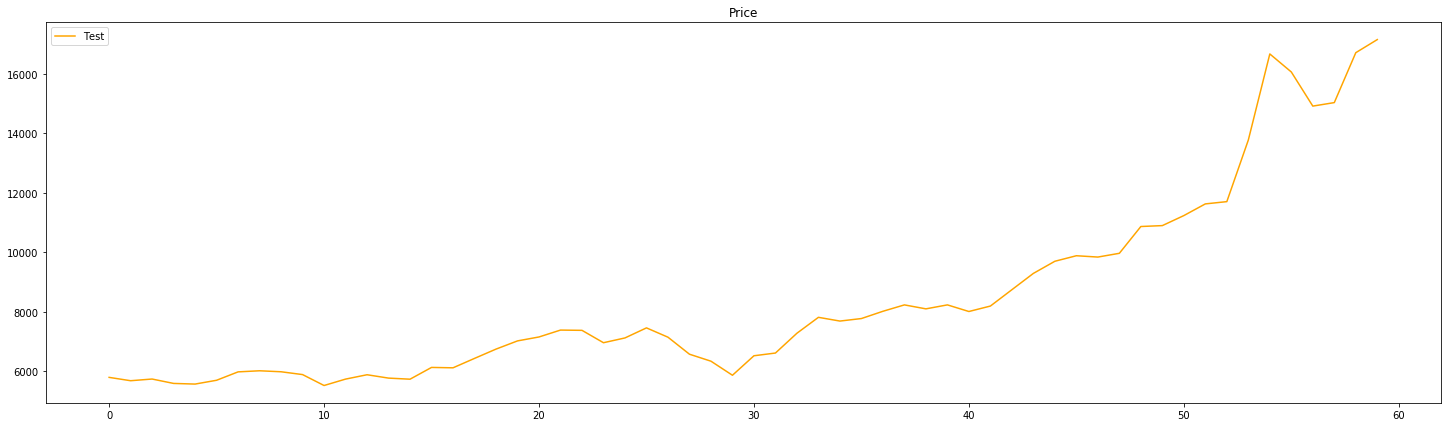

In [17]:
prices = dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)].as_matrix().ravel()
plt.figure(figsize=(25,7))
plt.plot(prices,label='Test',color='orange')
plt.title('Price')
plt.legend(loc='upper left')
plt.show()

### Plotting MACD

In [18]:
macd = MACD(dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)],12,26,9)

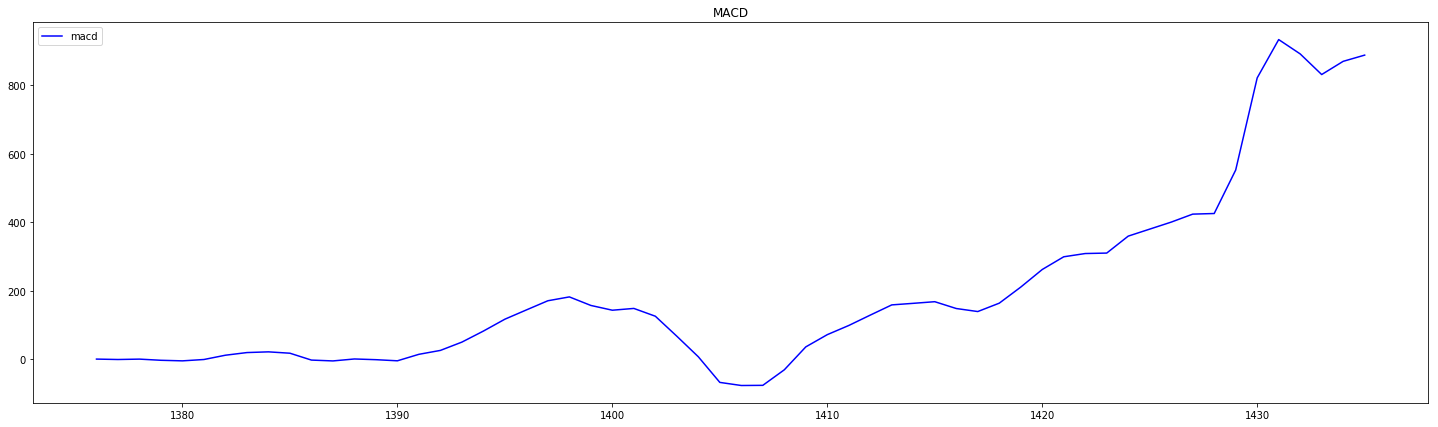

In [19]:
plt.figure(figsize=(25,7))
plt.plot(macd,label='macd',color='blue')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

### Plotting Stochastics Oscillator

In [20]:
stochastics = stochastics_oscillator(dfPrices.iloc[len(dfPrices.index)-60:len(dfPrices.index)],14)

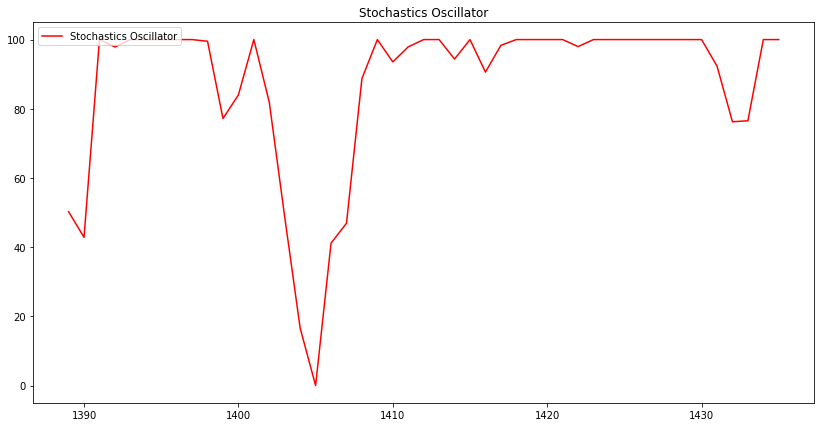

In [21]:
plt.figure(figsize=(14,7))
#First 100 points due to extreme density
plt.plot(stochastics[0:100],label='Stochastics Oscillator',color='red')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

### Plotting Average True Range

In [22]:
atr = ATR(df.iloc[len(df.index)-60:len(df.index)],14)

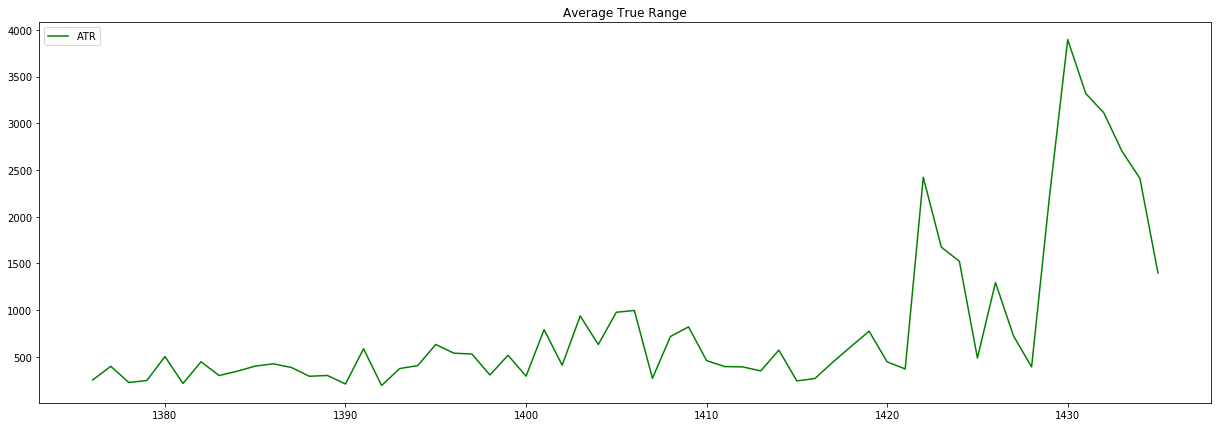

In [23]:
plt.figure(figsize=(21,7))
#First 100 points due to extreme density
plt.plot(atr[0:100],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

## Create Final Dataframe and Save Data

In [24]:
dfPriceShift = dfPrices.shift(-1)
dfPriceShift.rename(columns={'Average Close Price (USD)':'Average Close Price Target (USD)'}, inplace=True)
dfPriceShift.head(2)

Average Close Price Target (USD)
0                        825.656790
1                        838.876447

In [25]:
macd = MACD(dfPrices,12,26,9)
macd.rename(columns={'Average Close Price (USD)':'MACD'}, inplace=True)

In [26]:
stochastics = stochastics_oscillator(dfPrices,14)
stochastics.rename(columns={'Average Close Price (USD)':'Stochastics'}, inplace=True)

In [27]:
atr = ATR(df,14)
atr.rename(columns={0:'ATR'}, inplace=True)

In [28]:
final_data = pd.concat([dfPrices,dfPriceShift,macd,stochastics,atr], axis=1)
# Delete the entries with missing values (where the stochastics couldn't be computed yet) 
final_data = final_data.dropna()

In [29]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 13 to 1434
Data columns (total 5 columns):
Average Close Price (USD)           1422 non-null float64
Average Close Price Target (USD)    1422 non-null float64
MACD                                1422 non-null float64
Stochastics                         1422 non-null float64
ATR                                 1422 non-null float64
dtypes: float64(5)
memory usage: 66.7 KB


In [30]:
final_data

Average Close Price (USD)  Average Close Price Target (USD)        MACD  \
13                   831.045463                        821.300000   -1.712121   
14                   821.300000                        819.029997   -1.690852   
15                   819.029997                        819.699457   -1.725941   
16                   819.699457                        788.295283   -1.639052   
17                   788.295283                        809.606667   -3.255442   
18                   809.606667                        817.040530   -3.011648   
19                   817.040530                        764.078500   -2.288495   
20                   764.078500                        799.663333   -4.799199   
21                   799.663333                        796.403333   -4.209485   
22                   796.403333                        803.979233   -3.819920   
23                   803.979233                        805.063457   -2.915930   
24                   805.063457                        817.626600   -2.079047   
25                   817.626600                        814.927155   -0.593037   
26                   814.927155                        812.760000    0.338034   
27                   812.760000                        806.130000    0.884600   
28                   806.130000                        791.943333    0.855184   
29                   791.943333                        767.717347   -0.071531   
30                   767.717347                        713.044020   -2.260588   
31                   713.044020                        689.930850   -7.280388   
32                   689.930850                        695.456667  -12.040765   
33                   695.456667                        694.777200  -14.548913   
34                   694.777200                        682.844437  -15.795274   
35                   682.844437                        669.218633  -16.858266   
36                   669.218633                        620.770473  -17.858036   
37                   620.770473                        673.779880  -21.137115   
38                   673.779880                        656.165567  -18.964076   
39                   656.165567                        617.910370  -17.840244   
40                   617.910370                        645.203867  -18.895788   
41                   645.203867                        630.740033  -16.908996   
42                   630.740033                        627.860597  -15.713786   
...                         ...                               ...         ...   
1405                5873.277500                       6528.225000 -139.020185   
1406                6528.225000                       6619.692500 -153.286768   
1407                6619.692500                       7285.140000 -156.221843   
1408                7285.140000                       7819.490000 -109.686248   
1409                7819.490000                       7693.945000  -39.039513   
1410                7693.945000                       7778.510000   -0.978175   
1411                7778.510000                       8022.372500   27.977721   
1412                8022.372500                       8237.052500   60.994026   
1413                8237.052500                       8103.910000   93.655265   
1414                8103.910000                       8237.372500   99.945353   
1415                8237.372500                       8015.040000  106.466664   
1416                8015.040000                       8198.137500   87.277343   
1417                8198.137500                       8747.122500   79.579373   
1418                8747.122500                       9295.180000  106.408069   
1419                9295.180000                       9702.945000  156.538566   
1420                9702.945000                       9888.512500  211.249541   
1421                9888.512500                       9844.125000  251.251196   
1422                9844.125000      

In [31]:
final_data.to_csv('BTC_USD_TechnicalIndicators.csv',index=False)

# First Framework - Recurrent Neural Network trained on Initial Features (Historical Bitcoin Prices) and Secondary Features ( Fiat Currency Stock Market Technical Indicators)

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## Read the data

In [33]:
df = pd.read_csv('BTC_USD_TechnicalIndicators.csv')
df.head(2)

Average Close Price (USD)  Average Close Price Target (USD)      MACD  \
0                 831.045463                        821.300000 -1.712121   
1                 821.300000                        819.029997 -1.690852   

   Stochastics        ATR  
0    34.862388  30.227933  
1    24.314425  25.633297

## Normalize the data

In [34]:
dfNorm = (df - df.mean()) / (df.max() - df.min())
dfNorm.head()

Average Close Price (USD)  Average Close Price Target (USD)      MACD  \
0                  -0.018616                         -0.019383 -0.008789   
1                  -0.019205                         -0.019517 -0.008770   
2                  -0.019342                         -0.019477 -0.008801   
3                  -0.019302                         -0.021327 -0.008725   
4                  -0.021201                         -0.020072 -0.010136   

   Stochastics       ATR  
0    -0.220788 -0.012736  
1    -0.326268 -0.013916  
2    -0.348734 -0.017287  
3    -0.342109 -0.016408  
4    -0.569412 -0.008866

## Defining the Hyperparameters

In [35]:
num_epochs = 100
total_series_length = len(df.index)
# Sequence Size
truncated_backprop_length = 3
# Number of neurons
state_size = 12 
num_classes = 1
num_features = 4
batch_size = 1
num_batches = total_series_length//batch_size//truncated_backprop_length
min_test_size = 100

print('The total length of the series is: {}'.format(total_series_length))
print('The current configuration gives us {} batches of {} observation each, where each one is looking {} steps in the past'.format(num_batches,batch_size,truncated_backprop_length))

The total length of the series is: 1422
The current configuration gives us 474 batches of 1 observation each, where each one is looking 3 steps in the past


## Splitting the data into Training and Testing sets

In [36]:
dfTrain = dfNorm[df.index < num_batches*batch_size*truncated_backprop_length]


for i in range(min_test_size,len(dfNorm.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(dfNorm.index)-i
        break

dfTest =  dfNorm[df.index >= test_first_idx]

In [37]:
dfTrain.head()

Average Close Price (USD)  Average Close Price Target (USD)      MACD  \
0                  -0.018616                         -0.019383 -0.008789   
1                  -0.019205                         -0.019517 -0.008770   
2                  -0.019342                         -0.019477 -0.008801   
3                  -0.019302                         -0.021327 -0.008725   
4                  -0.021201                         -0.020072 -0.010136   

   Stochastics       ATR  
0    -0.220788 -0.012736  
1    -0.326268 -0.013916  
2    -0.348734 -0.017287  
3    -0.342109 -0.016408  
4    -0.569412 -0.008866

In [38]:
dfTest.head()

Average Close Price (USD)  Average Close Price Target (USD)      MACD  \
1320                   0.229252                          0.204506  0.021086   
1321                   0.210649                          0.204507  0.007767   
1322                   0.210649                          0.188199 -0.005007   
1323                   0.193907                          0.193255 -0.034349   
1324                   0.199098                          0.204309 -0.051670   

      Stochastics       ATR  
1320     0.430588  0.041945  
1321     0.100816  0.101170  
1322     0.100827  0.058924  
1323    -0.254283  0.103168  
1324    -0.199283  0.087348

In [39]:
xTrain = dfTrain[['Average Close Price (USD)','MACD','Stochastics','ATR']].as_matrix()
yTrain = dfTrain['Average Close Price Target (USD)'].as_matrix()

In [40]:
print(xTrain[0:3],'\n',yTrain[0:3])

[[-0.01861575 -0.00878864 -0.2207879  -0.01273624]
 [-0.01920518 -0.00877007 -0.32626754 -0.01391607]
 [-0.01934248 -0.00880071 -0.34873449 -0.01728667]] 
 [-0.01938293 -0.01951667 -0.01947723]


In [41]:
xTest = dfTest[['Average Close Price (USD)','MACD','Stochastics','ATR']].as_matrix()
yTest = dfTest['Average Close Price Target (USD)'].as_matrix()

In [42]:
print(xTest[0:3],'\n',yTest[0:3])

[[ 0.22925166  0.02108565  0.43058822  0.04194472]
 [ 0.21064879  0.00776725  0.10081591  0.10117024]
 [ 0.21064939 -0.00500709  0.10082663  0.05892424]] 
 [ 0.2045064   0.20450699  0.18819902]


## Visualizing the starting average close price data

In [43]:
start_avg_cp_train_trace = go.Scatter(y=xTrain[:,0])
layout = dict(title = 'Train Data (' + str(len(xTrain)) + ' data points)')
fig = dict(data=[start_avg_cp_train_trace], layout=layout)
py.iplot(fig)

In [44]:
start_avg_cp_test_trace = go.Scatter(y=xTest[:,0])
layout = dict(title = 'Test Data (' + str(len(xTest)) + ' data points)')
fig = dict(data=[start_avg_cp_test_trace], layout=layout)
py.iplot(fig)

## Placeholders

In [45]:
batchX_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_features],name='data_ph')
batchY_placeholder = tf.placeholder(dtype=tf.float32,shape=[None,truncated_backprop_length,num_classes],name='target_ph')

## Weights and Biases

Since I have considered a 3 layer neural network comprising of:

1. Input Layer
2. Hidden Recurrent Layer
3. Output Layer

and output is a result of linear activation of last layer of RNN; we need only a single pair Weight and Bias.

In [46]:
weight = tf.Variable(tf.truncated_normal([state_size,num_classes]))
bias = tf.Variable(tf.constant(0.1,shape=[num_classes]))
# Unpack
labels_series = tf.unstack(batchY_placeholder, axis=1)

## Forward Pass (Unroll the cell)

Input to RNN

In [47]:
cell = tf.contrib.rnn.BasicRNNCell(num_units=state_size)

states_series, current_state = tf.nn.dynamic_rnn(cell=cell,inputs=batchX_placeholder,dtype=tf.float32)

states_series = tf.transpose(states_series,[1,0,2])

## Backward Pass (Output)

In [48]:
last_state = tf.gather(params=states_series,indices=states_series.get_shape()[0]-1)
last_label = tf.gather(params=labels_series,indices=len(labels_series)-1)

## Prediction, Loss and Optimizer

In [49]:
prediction = tf.matmul(last_state,weight) + bias
prediction

<tf.Tensor 'add:0' shape=(?, 1) dtype=float32>

In [50]:
loss = tf.reduce_mean(tf.squared_difference(last_label,prediction))
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

/Users/Arjun/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:96: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



In [51]:
loss_list = []
test_pred_list = []

with tf.Session() as sess:
    
    tf.global_variables_initializer().run()
    
    for epoch_idx in range(num_epochs):
                
        print('Epoch {}'.format(epoch_idx))
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length * batch_size
        
            
            batchX = xTrain[start_idx:end_idx,:].reshape(batch_size,truncated_backprop_length,num_features)
            batchY = yTrain[start_idx:end_idx].reshape(batch_size,truncated_backprop_length,1)
            
            feed = {batchX_placeholder : batchX, batchY_placeholder : batchY}
            
            # TRAIN
            _loss,_train_step,_pred,_last_label,_prediction = sess.run(
                fetches=[loss,train_step,prediction,last_label,prediction],
                feed_dict = feed
            )
            
            loss_list.append(_loss)
            
           
            
            if(batch_idx % 200 == 0):
                print('Step {} - Loss: {:.6f}'.format(batch_idx,_loss))
                
    # TEST 
    for test_idx in range(len(xTest) - truncated_backprop_length):
        
        testBatchX = xTest[test_idx:test_idx+truncated_backprop_length,:].reshape((1,truncated_backprop_length,num_features))        
        testBatchY = yTest[test_idx:test_idx+truncated_backprop_length].reshape((1,truncated_backprop_length,1))

        feed = {batchX_placeholder : testBatchX,
            batchY_placeholder : testBatchY}

        # test_pred contains 'window_size' predictions, we want the last one
        _last_state,_last_label,test_pred = sess.run([last_state,last_label,prediction],feed_dict=feed)
        # The last test_pred
        test_pred_list.append(test_pred[-1][-1]) 

Epoch 0
Step 0 - Loss: 0.519877
Step 200 - Loss: 0.009074
Step 400 - Loss: 0.000134
Epoch 1
Step 0 - Loss: 0.054404
Step 200 - Loss: 0.000134
Step 400 - Loss: 0.000617
Epoch 2
Step 0 - Loss: 0.066701
Step 200 - Loss: 0.000003
Step 400 - Loss: 0.000109
Epoch 3
Step 0 - Loss: 0.000800
Step 200 - Loss: 0.000023
Step 400 - Loss: 0.000234
Epoch 4
Step 0 - Loss: 0.005002
Step 200 - Loss: 0.000035
Step 400 - Loss: 0.000091
Epoch 5
Step 0 - Loss: 0.007903
Step 200 - Loss: 0.000028
Step 400 - Loss: 0.000392
Epoch 6
Step 0 - Loss: 0.002848
Step 200 - Loss: 0.000051
Step 400 - Loss: 0.000196
Epoch 7
Step 0 - Loss: 0.013358
Step 200 - Loss: 0.000001
Step 400 - Loss: 0.000809
Epoch 8
Step 0 - Loss: 0.009110
Step 200 - Loss: 0.000046
Step 400 - Loss: 0.000316
Epoch 9
Step 0 - Loss: 0.016737
Step 200 - Loss: 0.000004
Step 400 - Loss: 0.001043
Epoch 10
Step 0 - Loss: 0.016592
Step 200 - Loss: 0.000008
Step 400 - Loss: 0.000170
Epoch 11
Step 0 - Loss: 0.025623
Step 200 - Loss: 0.000019
Step 400 - Loss:

Step 400 - Loss: 0.000056
Epoch 97
Step 0 - Loss: 0.000874
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000016
Epoch 98
Step 0 - Loss: 0.000125
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000057
Epoch 99
Step 0 - Loss: 0.000819
Step 200 - Loss: 0.000000
Step 400 - Loss: 0.000026


In [52]:
trace = go.Scatter(
    x = np.arange(0,len(loss_list)),
    y = loss_list,
    mode = 'markers', 
)

layout = go.Layout(
    title= "Loss",  
    xaxis=dict(
    title='epochs',
    ), 
    yaxis=dict(
    title='loss',
    )  
)

data = go.Data([trace])

fig = go.Figure(data = data, layout = layout)

py.iplot(fig)

In [53]:
avg_cp_trace = go.Scatter(y=yTest, name = 'Average Close Price (USD)', line = dict(color = ('rgb(205, 12, 24)'), width = 4))
pred_avg_cp_trace = go.Scatter(y=test_pred_list, name = 'Predicted Average Close Price (USD)', line = dict(color = ('rgb(22, 96, 167)'), width = 4))
layout = dict(title = 'Average Close Price (USD) vs Predicted Average Close Price (USD)')
fig = dict(data=[avg_cp_trace, pred_avg_cp_trace], layout=layout)
py.iplot(fig)

# Second Framework - LSTM trained on Initial Features (Historical Bitcoin Prices) and Secondary Features (Sentiments of Top Articles for each day from 01/07/2014 to 12/12/2017)

You can get a deeper understanding of how I scraped the articles and computed their sentiments in my notebooks titled [Google News Scraper](Google News Scraper.ipynb) and [Sentiment Analysis of Top Google News Articles for keyword bitcoin](Sentiment Analysis of Top Google News Articles for keyword bitcoin.ipynb).

# References

<a id='ref1'>\[1\]</a> Reid F, Harrigan M. An analysis of anonymity in the bitcoin system: Springer; 2013.<br>
<a id='ref2'>\[2\]</a> Böhme R, Christin N, Edelman B, Moore T. Bitcoin: Economics, technology, and governance. The Journal of Economic Perspectives. 2015;29(2):213–38.<br>
<a id='ref3'>\[3\]</a> Nakamoto S. Bitcoin: A peer-to-peer electronic cash system. 2008.<br>
<a id='ref4'>\[4\]</a> Kondor D, Pósfai M, Csabai I, Vattay G. Do the rich get richer? An empirical analysis of the Bitcoin transaction network. PloS one. 2014;9(2):e86197 doi: [10.1371/journal.pone.0086197](http://dx.doi.org/10.1371/journal.pone.0086197) [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3914786/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/24505257)<br>
<a id='ref5'>\[5\]</a> Ron D, Shamir A. Quantitative analysis of the full bitcoin transaction graph Financial Cryptography and Data Security: Springer; 2013. p. 6–24.<br>
<a id='ref6to10'>\[6\]</a> Garcia D, Tessone CJ, Mavrodiev P, Perony N. The digital traces of bubbles: feedback cycles between socio-economic signals in the Bitcoin economy. Journal of the Royal Society Interface. 2014;11(99):20140623. [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4233744/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/25100315)<br>
\[7\] Kondor D, Csabai I, Szüle J, Pósfai M, Vattay G. Inferring the interplay between network structure and market effects in Bitcoin. New Journal of Physics. 2014;16(12):125003.<br>
\[8\] Kristoufek L. BitCoin meets Google Trends and Wikipedia: Quantifying the relationship between phenomena of the Internet era. Scientific reports. 2013;3. [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3849639/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/24301322)<br>
\[9\] Kristoufek L. What are the main drivers of the Bitcoin price? Evidence from wavelet coherence analysis. PloS one. 2015;10(4):e0123923 doi: [10.1371/journal.pone.0123923](http://dx.doi.org/10.1371/journal.pone.0123923) [\[PMC free article\]](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4398561/) [\[PubMed\]](https://www.ncbi.nlm.nih.gov/pubmed/25874694)<br>
\[10\] Yelowitz A, Wilson M. Characteristics of Bitcoin users: an analysis of Google search data. Applied Economics Letters. 2015;22(13):1030–6.<br>